In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Goal:
**Assuming** the tidal force of the Moon is exactly the same as present day

Explore the (mass, density) space, look at impact on angular size

Note: mass of the moon is directly tied to distance via the tidal force being fixed

In [2]:
def _tidal_force(M2, d, M1=5.974e27):
    return (M1*M2) / (d**3.)

In [3]:
def newDist(M2, M2_0=7.36e25, M1=5.974e27, d0=3.844e10):
    '''
    compute the distance of the Moon given a new mass,
    assuming a fixed Tidal Force
    '''
    # compute the original Tidal Force
    t0 = (M1*M2_0) / (d0**3.)
    
    # invert eqn above for new mass
    d = ((M1*M2) / t0)**(1./3.)
    return d

In [4]:
def newRadius(mass, density):
    '''
    compute the radius of the Moon given a mass and mean density 
    '''
    R = (mass / (4./3. * np.pi * density))**(1./3.)
    return R

In [5]:
def AngularSize(radius, dist):
    hyp = (radius**2. + dist**2.)**0.5
    
    # use Law of Sines
    theta = np.arcsin(radius/hyp) # in radians
    return theta * 180. / np.pi # return in deg

In [6]:
# actual values
M_moon = 7.36e25 # (g)
R_moon = 1.7371e8 # (cm)
D_moon = 3.844e10 # (cm)

rho_moon = M_moon / (4./3. * np.pi * R_moon**3.)

# parameter space to explore
density = np.arange(2, 4.5, 0.1)
mass = np.arange(0.1, 2.1, 0.1) * M_moon

dist = newDist(mass) # mass yields distance, due to fixed Tidal Force

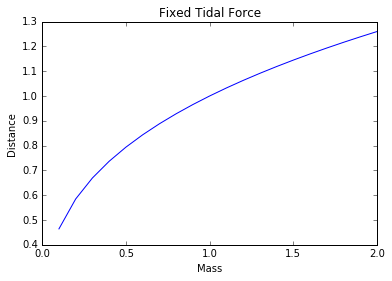

In [7]:
plt.plot(mass/M_moon, dist/D_moon)
plt.xlabel('Mass')
plt.ylabel('Distance')
plt.title('Fixed Tidal Force')

In [34]:
NewSize = np.zeros((len(mass), len(density)))

for i in range(len(mass)):
    for j in range(len(density)):
        radius = newRadius(mass[i], density[j])
        NewSize[i,j] = AngularSize(radius, dist[i])

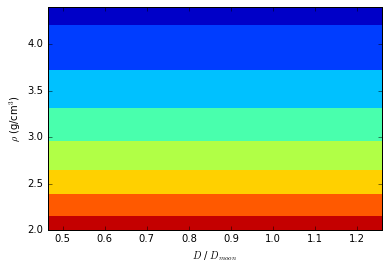

In [35]:
xx, yy = np.meshgrid(dist, density, indexing='ij')

plt.contourf(xx / D_moon, yy, NewSize)
plt.xlabel('$D$ / $D_{moon}$')
plt.ylabel(r'$\rho$ (g/cm$^3$)')

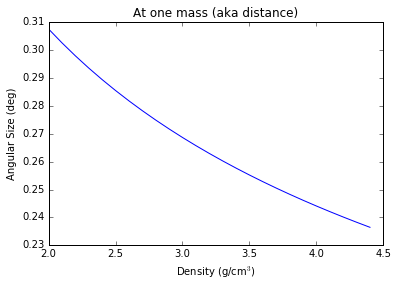

In [36]:
plt.plot(density, NewSize[0,:])
plt.xlabel('Density (g/cm$^3$)')
plt.ylabel('Angular Size (deg)')
plt.title('At one mass (aka distance)')

So at a given mass (or equivalently distance) the angular size goes down with increasing density. This is pretty intuititve

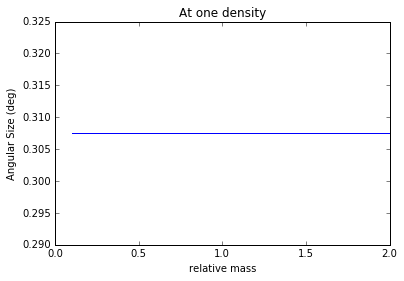

In [37]:
plt.plot(mass / M_moon, NewSize[:,0])
plt.xlabel('relative mass')
plt.ylabel('Angular Size (deg)')
plt.title('At one density')

But at a given density, if we require the tidal force to be the same, the angular size is the same!

Briefly, this is because 

$\rho = M / (4\pi/3 r^3) \propto r^{1/3}$

and 

angular size goes down as $d^2$

and

